In [1]:
import numpy as np
import pandas as pd
import torch
import config
import utils
import cv2
import PIL
import torchvision
import matplotlib.pyplot as plt

In [37]:
device = torch.device("cuda")
# model = utils.get_model_instance_segmentation(config.num_classes)
model = torch.load("model.pth")
# model.load_state_dict(torch.load('model.pth'))
model.to(device)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [29]:
img_ori = cv2.imread("my_data/train/8,8400__2022-02-08 14_08_29.246_marel.png")

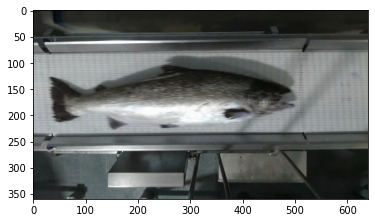

In [30]:
plt.imshow(img_ori)

In [38]:
img = PIL.Image.open("my_data/train/8,8400__2022-02-08 14_08_29.246_marel.png").convert('RGB')
img = torchvision.transforms.ToTensor()(img)
# img = img.unsqueeze(0)
img = img.to(device)

In [39]:
mask = model([img])

In [40]:
print('Encontro '+str(len(mask[0]['labels']))+' cosas')
print(mask[0]['scores'])

Encontro 18 cosas
tensor([0.5883, 0.5731, 0.4785, 0.2892, 0.2765, 0.2336, 0.2160, 0.1989, 0.1732,
        0.1398, 0.1035, 0.0711, 0.0673, 0.0671, 0.0657, 0.0592, 0.0556, 0.0503],
       device='cuda:0', grad_fn=<IndexBackward0>)


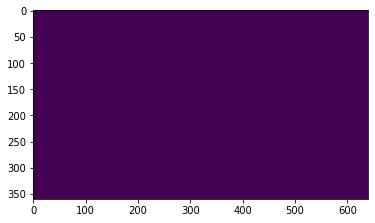

In [41]:
# mask_rgb = utils.decode_segmap(mask[0].cpu().numpy().argmax(0))
mask_bin = (mask[0]['masks']>0.5)[0].squeeze(0).cpu().detach().numpy()
# plt.imshow(mask[0]['masks'][3].squeeze(0).cpu().detach().numpy())
plt.imshow(mask_bin)

In [11]:
import numpy
import json
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

annots = json.load(open("my_data/my_train_coco.json"))
segm = annots["annotations"][0]["segmentation"][0]
img = Image.new('L', (640 , 380), 0)
ImageDraw.Draw(img).polygon(segm, outline=1, fill=1)
mask = numpy.array(img)

In [21]:
# pd.options.display.max_rows = 30
# pd.options.display.max_columns = 30
# pd.DataFrame(mask)

In [ ]:
cnts = cv2.findContours(close.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

centers = []
for c in cnts:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    centers.append((cX, cY))
    cv2.circle(close, (cX, cY), 2, (0, 0, 255), -1)
    
im_center = round(im_shape[0]/2,0)
if ((im_center - centers[0][0]) > 0) or (abs(im_center - centers[0][0]) < 10):
    print('this count')
    cv2.imshow('image', close)      
    cv2.waitKey(0)
cv2.destroyAllWindows()

centers = np.array(centers)
# print(centers)
if len(centers) > 1:
    # dist_temp=dist.euclidean(centers[0], centers[1])
    # dist_temp = []
    for i in range(len(centers)):
        for j in range(i+1, len(centers)):
            dist_temp = dist.euclidean(centers[i], centers[j])
            if dist_temp < 250:
                cv2.drawContours(close, [np.array([centers[i], centers[j]])], 0, (255,255,255), 10)
                cnts = cv2.findContours(close.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cnts = imutils.grab_contours(cnts)